<a href="https://colab.research.google.com/github/yunchocopie/machine-learing/blob/main/241204_KNearestNeighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Nearest Neighbors (KNN)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

## Dataset

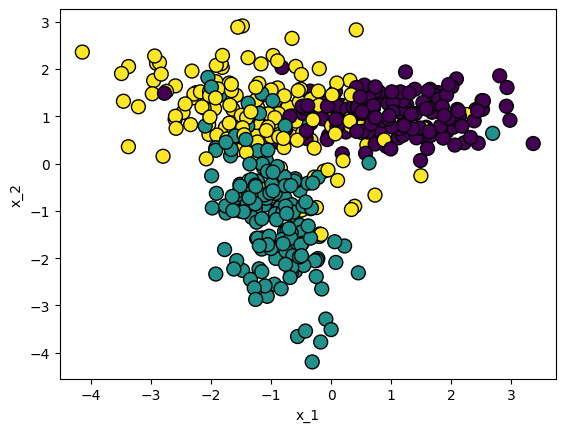

In [ ]:
X, y = make_classification(n_samples=500,
                           n_features=2,
                           n_classes=3,
                           n_clusters_per_class=1,
                           n_informative=2,
                           n_redundant=0,
                           random_state=40)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor="k", linewidth=1)
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.show()

In [ ]:
# Training/Testing Dataset 분리 (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print("Training samples: ", len(X_train))
print("Testing samples: ", len(X_test))

Training samples:  400
Testing samples:  100


## Model


In [ ]:
def L2_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
  def __init__(self, k=3):
    # initialization
    self.k = k
    self.X_train = None
    self.y_train = None

  def fit(self, X, y):
    # Storage training datas
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    # Prediction

    y_pred = [] # 최종 prediction 정보 저장을 위한 list 저장

    for input in X: # 입력으로 들어오는 데이터에 대한 반복문 실행
      distances = [] # 데이터 간 거리를 저장하기 위한 list 생성 (distances)

      for train in self.X_train: # training 데이터에 대한 반복문 실행
        distances.append(L2_distance(input, train)) # 거리 계산 및 distances list에 저장

      index = np.argsort(distances)[: self.k] # distances list의 sort을 통한 index 추출
      label = [] # label 저장을 위한 list 생성

      for i in index: # 추출된 index 대한 반복문 생성
        label.append(self.y_train[i]) # label 저장

      prediction = max(label, key=label.count) # 저장된 label에서 빈도가 높은 값 저장
      y_pred.append(prediction) # 최종 prediction list에 label값 저장


    return y_pred # 최종 prediction list 반환

## Prediction

In [ ]:
model = KNN()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = np.sum(y_pred == y_test) / len(y_test)
print(accuracy)

0.81


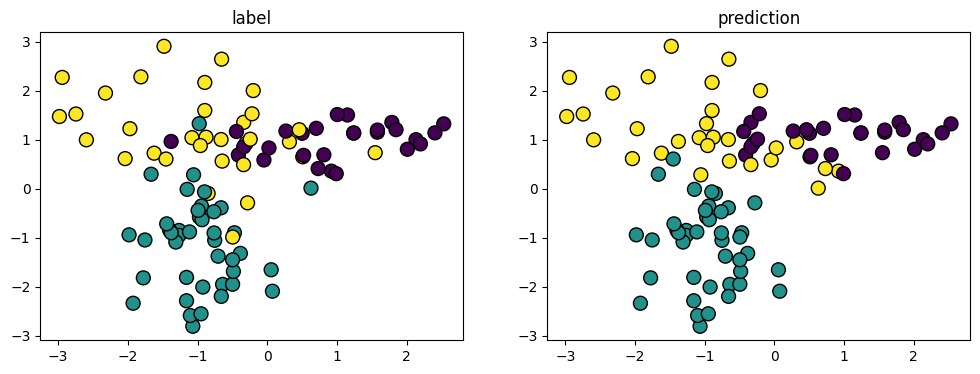

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.title("label")
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test, s=100, edgecolor="k", linewidth=1)

plt.subplot(1, 2, 2)
plt.title("prediction")
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_pred, s=100, edgecolor="k", linewidth=1)
plt.show()

### 기말고사 연습문제

In [ ]:
X, y = make_classification(n_samples=500,
                           n_features=2,
                           n_classes=4,
                           n_clusters_per_class=1,
                           n_informative=2,
                           n_redundant=0,
                           random_state=40)

X[:, 0] = X[:, 0] * 0.1 - 100
X[:, 1] = X[:, 1] * 100 + 120

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor="k", linewidth=1)
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.show()

In [ ]:
# Training/Testing Dataset 분리 (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print("Training samples: ", len(X_train))
print("Testing samples: ", len(X_test))

In [ ]:
model = KNN(k=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = np.sum(y_pred == y_test) / len(y_test)
print(accuracy)